C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The accuracy score of K-Mean:  0.8933333333333333
The Confusion matrix of K-Mean: 
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
The accuracy score of EM:  0.9666666666666667
The Confusion matrix of EM: 
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


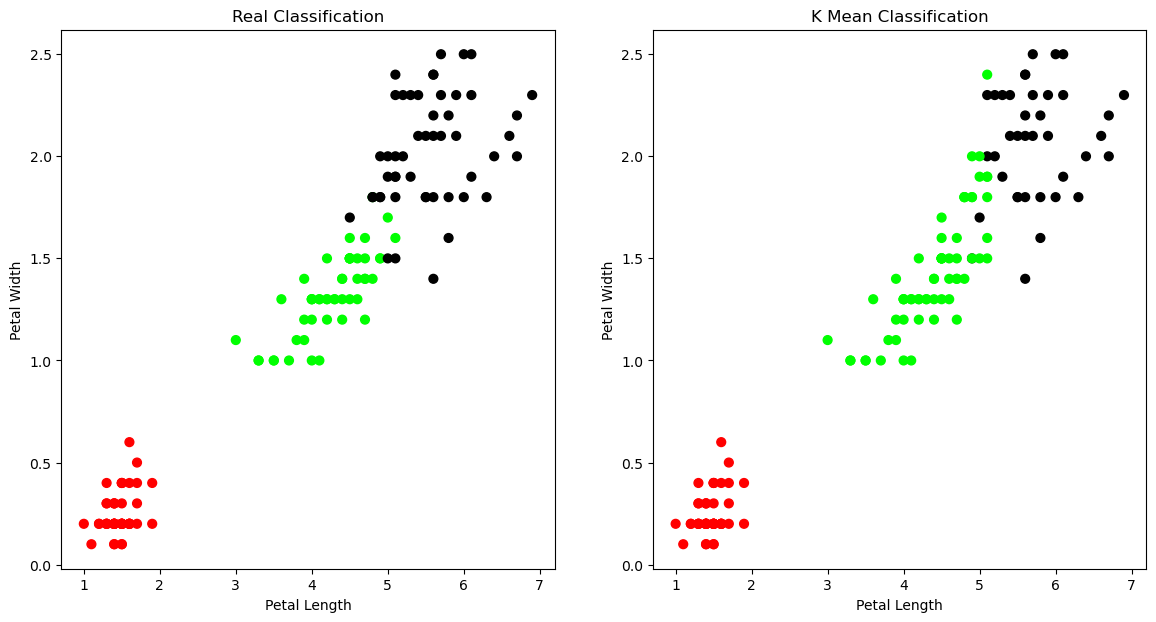

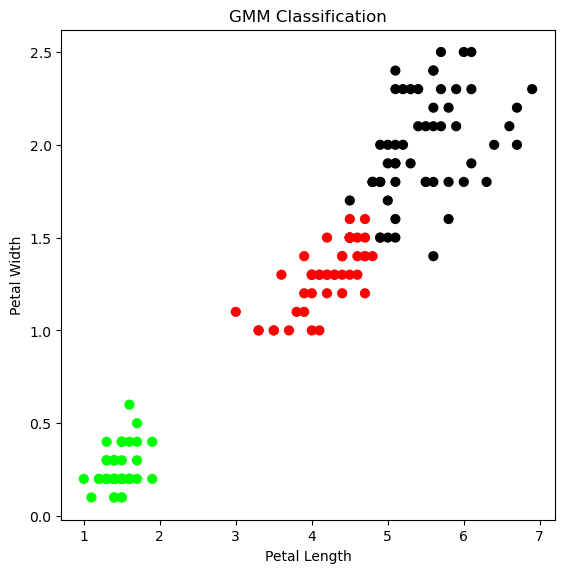

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from scipy.stats import mode

iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)
plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Correct KMeans accuracy calculation
labels = np.zeros_like(model.labels_)
for i in range(3):
    mask = (model.labels_ == i)
    labels[mask] = mode(iris.target[mask])[0]

print('The accuracy score of K-Mean: ', sm.accuracy_score(iris.target, labels))
print('The Confusion matrix of K-Mean: \n', sm.confusion_matrix(iris.target, labels))

scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns=X.columns)
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_gmm = gmm.predict(xs)

plt.figure(figsize=(14, 14))
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Correct GMM accuracy calculation
labels_gmm = np.zeros_like(y_gmm)
for i in range(3):
    mask = (y_gmm == i)
    labels_gmm[mask] = mode(iris.target[mask])[0]

print('The accuracy score of EM: ', sm.accuracy_score(iris.target, labels_gmm))
print('The Confusion matrix of EM: \n', sm.confusion_matrix(iris.target, labels_gmm))
